La función $f(x) = x^{1/3}$ tiene raíz en $x=0$. Usando el punto de inicio de $x=1$ y $p_0 = 5$, $p_1 = 0.5$ para el método de secante, compare los resultados de los métodos de la secante y de Newton.

<ipython-input-12-1c5362c7fb14>:7: RuntimeWarning: invalid value encountered in power
  y_values = x_values**(1/3)


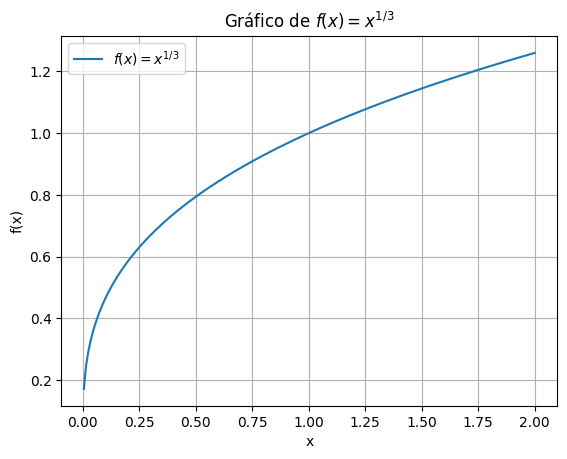

In [12]:
import matplotlib.pyplot as plt

# Creamos un rango de valores de x
x_values = np.linspace(-2, 2, 400)

# Calculamos los valores de y correspondientes a f(x) = x^(1/3)
y_values = x_values**(1/3)

# Graficamos la función
plt.plot(x_values, y_values, label=r'$f(x) = x^{1/3}$')

# Etiquetas y título
plt.xlabel('x')
plt.ylabel('f(x)')
plt.title('Gráfico de $f(x) = x^{1/3}$')

# Mostramos la leyenda
plt.legend()

# Mostramos el gráfico
plt.grid(True)
plt.show()


<ipython-input-13-3e8a5b6998c8>:7: RuntimeWarning: invalid value encountered in scalar power
  return (1/3) * x**(-2/3)


Raíz aproximada usando el método de Newton:  nan
Raíz aproximada usando el método de la secante:  -0.8203647038902435


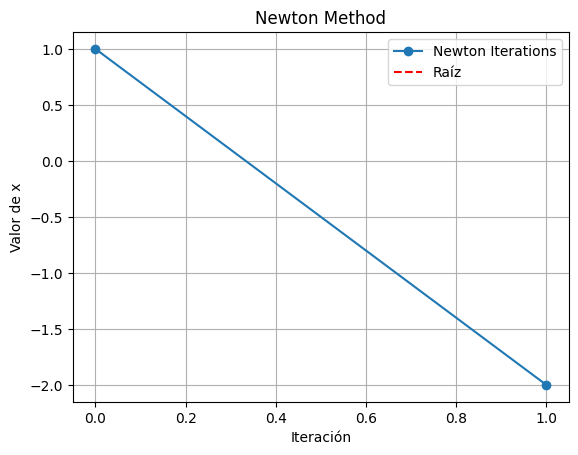

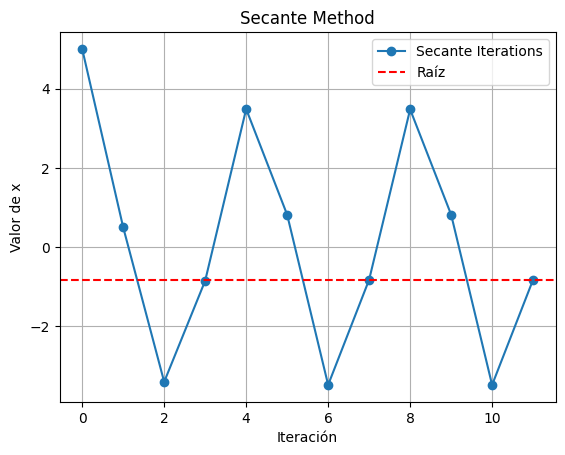

In [13]:
import numpy as np
# Definimos la función y su derivada
def f(x):
    return np.cbrt(x)  # x^(1/3)

def df(x):
    return (1/3) * x**(-2/3)

# Método de Newton
def newton_method(p0, tol=1e-10, max_iter=10):
    iterations = [p0]
    p = p0
    for i in range(max_iter):
        if df(p) == 0:
            raise ValueError("La derivada se anula en la iteración, el método no puede continuar.")
        p = p - f(p) / df(p)
        iterations.append(p)
        if abs(f(p)) < tol:
            break
    return p, iterations

# Método de la Secante
def secant_method(p0, p1, tol=1e-10, max_iter=10):
    iterations = [p0, p1]
    for i in range(max_iter):
        if f(p1) - f(p0) == 0:
            raise ValueError("Diferencia nula en el denominador, el método no puede continuar.")
        p = p1 - f(p1) * (p1 - p0) / (f(p1) - f(p0))
        p0, p1 = p1, p
        iterations.append(p)
        if abs(f(p)) < tol:
            break
    return p, iterations

# Parámetros iniciales
p0_newton = 1
p0_secant = 5
p1_secant = 0.5

# Ejecutar métodos
try:
    root_newton, iterations_newton = newton_method(p0_newton)
    print("Raíz aproximada usando el método de Newton: ", root_newton)
except ValueError as e:
    print(f"Error en el método de Newton: {e}")

try:
    root_secant, iterations_secant = secant_method(p0_secant, p1_secant)
    print("Raíz aproximada usando el método de la secante: ", root_secant)
except ValueError as e:
    print(f"Error en el método de la secante: {e}")

# Función para graficar las iteraciones
def plot_iterations(iterations, method_name, root):
    plt.plot(iterations, 'o-', label=f'{method_name} Iterations')
    plt.axhline(y=root, color='r', linestyle='--', label='Raíz')
    plt.xlabel('Iteración')
    plt.ylabel('Valor de x')
    plt.title(f'{method_name} Method')
    plt.legend()
    plt.grid()
    plt.show()

# Graficar iteraciones de cada método
if 'iterations_newton' in locals():
    plot_iterations(iterations_newton, 'Newton', root_newton)
if 'iterations_secant' in locals():
    plot_iterations(iterations_secant, 'Secante', root_secant)
